# 数据分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing, metrics, svm
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from xgboost import plot_importance

## 读取数据

In [2]:
# 读取训练集
data_train = pd.read_csv('flight_final.csv')

## 数据统计

In [5]:
print(data_train['延迟程度'].describe())

count     2328020
unique          5
top            轻度
freq       911330
Name: 延迟程度, dtype: object


## 直方图体现

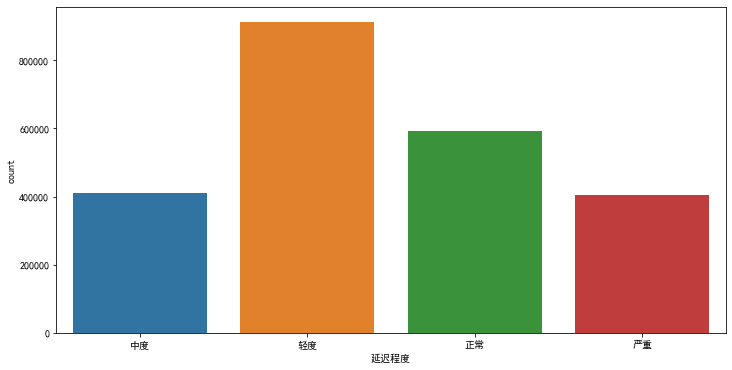

'\nplt.rcParams[\'font.sans-serif\'] = [\'SimHei\']  # 用来正常显示中文标签\nplt.rcParams[\'axes.unicode_minus\'] = False  # 用来正常显示负号\nsns.distplot(data_train[\'延迟程度\'], color="r")\n# sns.distplot(data_train[\'到达延迟\'], color="b")\nplt.title("到达延迟直方图")\nplt.show()\n'

In [10]:
# 延迟程度频次统计图
plt.figure(figsize=(12, 6))
sns.countplot(x='延迟程度', data=data_train)
plt.show()



'''
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
sns.distplot(data_train['延迟程度'], color="r")
# sns.distplot(data_train['到达延迟'], color="b")
plt.title("到达延迟直方图")
plt.show()
'''

## 相关性分析

In [ ]:
# 将出发机场,到达机场,航班编号,计划出发日期转换为数值

In [3]:
# 为出发机场,到达机场,航班编号,年,月,日,时间 字符串转化为可训练的变量
data_train['出发机场'] = data_train['出发机场'].astype('category')
data_train['到达机场'] = data_train['到达机场'].astype('category')
data_train['航班编号'] = data_train['航班编号'].astype('category')

# 字典映射编码
data_train['出发机场'] = data_train['出发机场'].cat.codes
data_train['到达机场'] = data_train['到达机场'].cat.codes
data_train['航班编号'] = data_train['航班编号'].cat.codes

# 延迟程度转化为one-hot编码
data_train['延迟程度'] = data_train['延迟程度'].astype('category')
data_train['延迟程度'] = data_train['延迟程度'].cat.codes


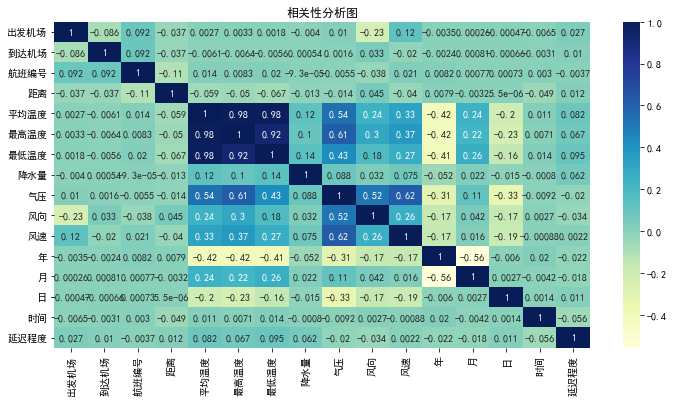

In [4]:
df_tmp1 = data_train[
    ['出发机场','到达机场','航班编号','距离','平均温度','最高温度','最低温度','降水量','气压','风向','风速','年','月','日','时间','延迟程度']]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
# 图片放大
plt.figure(figsize=(12, 6))
sns.heatmap(df_tmp1.corr(), cmap="YlGnBu", annot=True)
plt.title("相关性分析图")
plt.show()